## Data Loading

 ### Tone Classification

In [1]:
from datasets import load_dataset
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set CUDA_LAUNCH_BLOCKING to debug device-side errors
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

# Check if TONE_POLARITY and TONE_FORMALITY train/eval datasets already exist
if os.path.exists("tone_polarity_train.csv") and os.path.exists("tone_polarity_eval.csv") and \
   os.path.exists("tone_formality_train.csv") and os.path.exists("tone_formality_eval.csv") and \
    os.path.exists("tone_polarity_test.csv") and os.path.exists("tone_formality_test.csv"):
    tone_polarity_train = pd.read_csv("tone_polarity_train.csv")
    tone_polarity_eval = pd.read_csv("tone_polarity_eval.csv")
    tone_formality_train = pd.read_csv("tone_formality_train.csv")
    tone_formality_eval = pd.read_csv("tone_formality_eval.csv")
    tone_polarity_test = pd.read_csv("tone_polarity_test.csv")
    tone_formality_test = pd.read_csv("tone_formality_test.csv")
    print("TONE_POLARITY and TONE_FORMALITY datasets already exist")
else:
    print("Creating TONE_POLARITY and TONE_FORMALITY datasets...")

    # Step 1: Load and preprocess Amazon Polarity for TONE_POLARITY
    tone_polarity = load_dataset("fancyzhx/amazon_polarity")
    tone_polarity_df = pd.DataFrame({
        "task_type": "TONE_POLARITY",
        "input_text": tone_polarity["train"]["content"],
        "aux_text": None,  # No auxiliary text for TONE_POLARITY
        "label": tone_polarity["train"]["label"],  # 1 = Positive, 0 = Negative
    })

    tone_polarity_test_df = pd.DataFrame({
        "task_type": "TONE_POLARITY",
        "input_text": tone_polarity["test"]["content"],
        "aux_text": None,  # No auxiliary text for TONE_POLARITY
        "label": tone_polarity["test"]["label"],  # 1 = Positive, 0 = Negative
    })

    # Sample the dataset to make it more manageable
    tone_polarity_sampled = tone_polarity_df.sample(n=9200, random_state=42)
    tone_polarity_train, tone_polarity_eval = train_test_split(tone_polarity_sampled, test_size=0.2, random_state=42)
    tone_polarity_test_df = tone_polarity_test_df.sample(n=2000, random_state=42)

    # Save TONE_POLARITY datasets
    tone_polarity_train.to_csv("tone_polarity_train.csv", index=False)
    tone_polarity_eval.to_csv("tone_polarity_eval.csv", index=False)
    tone_polarity_test_df.to_csv("tone_polarity_test.csv", index=False)

    # Step 2: Load and preprocess Pavlick Formality Scores for TONE_FORMALITY
    tone_formality = load_dataset("osyvokon/pavlick-formality-scores")
    tone_formality_df = pd.DataFrame({
        "task_type": "TONE_FORMALITY",
        "input_text": tone_formality["train"]["sentence"],
        "aux_text": None,  # No auxiliary text for TONE_FORMALITY
        "label": tone_formality["train"]["avg_score"],  # Keep as float for regression
    })

    tone_formality_test_df = pd.DataFrame({
        "task_type": "TONE_FORMALITY",
        "input_text": tone_formality["test"]["sentence"],
        "aux_text": None,  # No auxiliary text for TONE_FORMALITY
        "label": tone_formality["test"]["avg_score"],  # Keep as float for regression
    })

    tone_formality_train, tone_formality_eval = train_test_split(tone_formality_df, test_size=0.2, random_state=42)

    # Save TONE_FORMALITY datasets
    tone_formality_train.to_csv("tone_formality_train.csv", index=False)
    tone_formality_eval.to_csv("tone_formality_eval.csv", index=False)
    tone_formality_test_df.to_csv("tone_formality_test.csv", index=False)

    print("TONE_POLARITY and TONE_FORMALITY datasets created and saved")

TONE_POLARITY and TONE_FORMALITY datasets already exist


### STS Benchmark

In [2]:
if os.path.exists("sts_benchmark_dataset_train.csv") and os.path.exists("sts_benchmark_dataset_eval.csv") and os.path.exists("sts_benchmark_dataset_test.csv"):
    print("Loading existing STS dataset")
    sts_train_data = pd.read_csv("sts_benchmark_dataset_train.csv")
    sts_eval_data = pd.read_csv("sts_benchmark_dataset_eval.csv")
    sts_test_data = pd.read_csv("sts_benchmark_dataset_test.csv")
else:
    print("Creating new STS CSV files")
    
    # Load STS Benchmark
    sts_dataset = load_dataset("mteb/stsbenchmark-sts")
    
    # Training data
    sts_train_data = pd.DataFrame({
        "task_type": "STS",
        "input_text": sts_dataset["train"]["sentence1"],
        "aux_text": sts_dataset["train"]["sentence2"],
        "similarity_score": sts_dataset["train"]["score"],  # Similarity score (0–5)
    })
    
    # Validation data
    sts_eval_data = pd.DataFrame({
        "task_type": "STS",
        "input_text": sts_dataset["validation"]["sentence1"],
        "aux_text": sts_dataset["validation"]["sentence2"],
        "similarity_score": sts_dataset["validation"]["score"],  # Similarity score (0–5)
    })

    sts_test_data = pd.DataFrame({
        "task_type": "STS",
        "input_text": sts_dataset["test"]["sentence1"],
        "aux_text": sts_dataset["test"]["sentence2"],
        "similarity_score": sts_dataset["test"]["score"],  # Similarity score (0–5)
    })
    
    # Save to CSV
    sts_train_data.to_csv("sts_benchmark_dataset_train.csv", index=False)
    sts_eval_data.to_csv("sts_benchmark_dataset_eval.csv", index=False)
    sts_test_data.to_csv("sts_benchmark_dataset_test.csv", index=False)
    print("STS Benchmark Train and Eval datasets created and saved")


Loading existing STS dataset


### PAWS

In [3]:
if os.path.exists("paws_dataset_train.csv") and os.path.exists("paws_dataset_eval.csv") and os.path.exists("paws_dataset_test.csv"):
    print("Loading existing PAWS dataset")
    paws_train_data = pd.read_csv("paws_dataset_train.csv")
    paws_eval_data = pd.read_csv("paws_dataset_eval.csv")
    paws_test_data = pd.read_csv("paws_dataset_test.csv")
else:
    print("Creating new PAWS CSV files")

    # Load PAWS
    paws_dataset = load_dataset("paws", "labeled_final")
    
    # Training data
    paws_train_data = pd.DataFrame({
        "task_type": "PAWS",
        "input_text": paws_dataset["train"]["sentence1"],
        "aux_text": paws_dataset["train"]["sentence2"],
        "paraphrase_label": paws_dataset["train"]["label"],  # 1 = Paraphrase, 0 = Not Paraphrase
    })
    
    # Validation data
    paws_eval_data = pd.DataFrame({
        "task_type": "PAWS",
        "input_text": paws_dataset["validation"]["sentence1"],
        "aux_text": paws_dataset["validation"]["sentence2"],
        "paraphrase_label": paws_dataset["validation"]["label"],  # 1 = Paraphrase, 0 = Not Paraphrase
    })

    paws_test_data = pd.DataFrame({
        "task_type": "PAWS",
        "input_text": paws_dataset["test"]["sentence1"],
        "aux_text": paws_dataset["test"]["sentence2"],
        "paraphrase_label": paws_dataset["test"]["label"],  # 1 = Paraphrase, 0 = Not Paraphrase
    })
    
    paws_train_data = paws_train_data.sample(frac=0.1).reset_index(drop=True)
    paws_eval_data = paws_eval_data.sample(frac=0.2).reset_index(drop=True)
    paws_test_data = paws_test_data.sample(frac=0.2).reset_index(drop=True)

    # Save to CSV
    paws_train_data.to_csv("paws_dataset_train.csv", index=False)
    paws_eval_data.to_csv("paws_dataset_eval.csv", index=False)
    paws_test_data.to_csv("paws_dataset_test.csv", index=False)
    print("PAWS Train and Eval datasets created and saved")


Loading existing PAWS dataset


### Combine Data

In [4]:
import pandas as pd
import os

# Load individual datasets
tone_polarity_train = pd.read_csv("tone_polarity_train.csv")
tone_polarity_eval = pd.read_csv("tone_polarity_eval.csv")
tone_polarity_test = pd.read_csv("tone_polarity_test.csv")

tone_formality_train = pd.read_csv("tone_formality_train.csv")
tone_formality_eval = pd.read_csv("tone_formality_eval.csv")
tone_formality_test = pd.read_csv("tone_formality_test.csv")

sts_train_data = pd.read_csv("sts_benchmark_dataset_train.csv")
sts_eval_data = pd.read_csv("sts_benchmark_dataset_eval.csv")
sts_test_data = pd.read_csv("sts_benchmark_dataset_test.csv")

paws_train_data = pd.read_csv("paws_dataset_train.csv")
paws_eval_data = pd.read_csv("paws_dataset_eval.csv")
paws_test_data = pd.read_csv("paws_dataset_test.csv")

sts_train_data.rename(columns={"similarity_score": "label"}, inplace=True)
sts_eval_data.rename(columns={"similarity_score": "label"}, inplace=True)
sts_test_data.rename(columns={"similarity_score": "label"}, inplace=True)

paws_train_data.rename(columns={"paraphrase_label": "label"}, inplace=True)
paws_eval_data.rename(columns={"paraphrase_label": "label"}, inplace=True)
paws_test_data.rename(columns={"paraphrase_label": "label"}, inplace=True)

# Encode TONE labels as integers
tone_encoder = LabelEncoder()
tone_polarity_train["label"] = tone_encoder.fit_transform(tone_polarity_train["label"]).astype(int)
tone_polarity_eval["label"] = tone_encoder.fit_transform(tone_polarity_eval["label"]).astype(int)
tone_polarity_test["label"] = tone_encoder.fit_transform(tone_polarity_test["label"]).astype(int)

num_tone_classes = len(tone_encoder.classes_)
print(f"Number of TONE classes: {num_tone_classes}")

# Combine train datasets
combined_train_data = pd.concat([tone_polarity_train, tone_formality_train, sts_train_data, paws_train_data], ignore_index=True)
combined_train_data = combined_train_data.sample(frac=0.1, random_state=42).reset_index(drop=True)

# Combine eval datasets
combined_eval_data = pd.concat([tone_polarity_eval, tone_formality_eval, sts_eval_data, paws_eval_data], ignore_index=True)
combined_eval_data = combined_eval_data.sample(frac=0.08, random_state=42).reset_index(drop=True)

# Combine test datasets
combined_test_data = pd.concat([tone_polarity_test, tone_formality_test, sts_test_data, paws_test_data], ignore_index=True)
combined_test_data = combined_test_data.sample(frac=0.15, random_state=42).reset_index(drop=True)

from sklearn.preprocessing import MinMaxScaler

# Normalize float labels
scaler = MinMaxScaler()
combined_train_data.loc[combined_train_data['task_type'] == 'TONE_FORMALITY', 'label'] = scaler.fit_transform(
    combined_train_data.loc[combined_train_data['task_type'] == 'TONE_FORMALITY', 'label'].values.reshape(-1, 1)
)

combined_eval_data.loc[combined_eval_data['task_type'] == 'TONE_FORMALITY', 'label'] = scaler.transform(
    combined_eval_data.loc[combined_eval_data['task_type'] == 'TONE_FORMALITY', 'label'].values.reshape(-1, 1)
)

combined_test_data.loc[combined_test_data['task_type'] == 'TONE_FORMALITY', 'label'] = scaler.transform(
    combined_test_data.loc[combined_test_data['task_type'] == 'TONE_FORMALITY', 'label'].values.reshape(-1, 1)
)

# STS normalization
combined_train_data.loc[combined_train_data['task_type'] == 'STS', 'label'] = scaler.fit_transform(
    combined_train_data.loc[combined_train_data['task_type'] == 'STS', 'label'].values.reshape(-1, 1)
)
combined_eval_data.loc[combined_eval_data['task_type'] == 'STS', 'label'] = scaler.transform(
    combined_eval_data.loc[combined_eval_data['task_type'] == 'STS', 'label'].values.reshape(-1, 1)
)

combined_test_data.loc[combined_test_data['task_type'] == 'STS', 'label'] = scaler.transform(
    combined_test_data.loc[combined_test_data['task_type'] == 'STS', 'label'].values.reshape(-1, 1)
)

# Save combined train and eval datasets
if os.path.exists("combined_train.csv") and os.path.exists("combined_eval.csv") and os.path.exists("combined_test.csv"):
    print("Loading existing combined datasets")
    combined_train_data = pd.read_csv("combined_train.csv")
    combined_eval_data = pd.read_csv("combined_eval.csv")
    combined_test_data = pd.read_csv("combined_test.csv")
else:
    print("Creating new combined datasets")
    combined_train_data.to_csv("combined_train.csv", index=False)
    combined_eval_data.to_csv("combined_eval.csv", index=False)
    combined_test_data.to_csv("combined_test.csv", index=False)

# Print results
print(f"Combined Train Dataset Size: {combined_train_data.shape}")
print(f"Combined Eval Dataset Size: {combined_eval_data.shape}")
print(f"Combined Test Dataset Size: {combined_test_data.shape}")
print(combined_train_data.head())
print(combined_eval_data.head())
print(combined_test_data.head())


Number of TONE classes: 2
Creating new combined datasets
Combined Train Dataset Size: (2547, 4)
Combined Eval Dataset Size: (544, 4)
Combined Test Dataset Size: (1047, 4)
        task_type                                         input_text  \
0  TONE_FORMALITY                                 they may help you.   
1             STS  Syria tells Russia some troops have pulled out...   
2             STS               Two dogs running through tall grass.   
3  TONE_FORMALITY                     when you ran out of 7 dominos.   
4   TONE_POLARITY  No problems. Fits the amp perfectly, and appea...   

                                       aux_text     label  
0                                           NaN  0.382609  
1  Syria says troops have begun pullout – video  0.680000  
2   Two dogs are running through a grassy area.  0.920000  
3                                           NaN  0.313043  
4                                           NaN  1.000000  
        task_type                   

## Training Preparation

### Tokenization

In [5]:
from transformers import AutoTokenizer

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize input and auxiliary text dynamically by task type
def tokenize_data(dataframe, max_length):
    input_ids, attention_masks = [], []

    for _, row in dataframe.iterrows():
        if pd.isna(row["aux_text"]):  # Single-sentence input
            tokenized = tokenizer(
                row["input_text"],
                truncation=True,
                padding="max_length",
                max_length=max_length,
            )
        else:  # Sentence-pair input
            tokenized = tokenizer(
                row["input_text"],
                row["aux_text"],
                truncation=True,
                padding="max_length",
                max_length=max_length,
            )

        input_ids.append(tokenized["input_ids"])
        attention_masks.append(tokenized["attention_mask"])

    dataframe["input_ids"] = input_ids
    dataframe["attention_mask"] = attention_masks
    return dataframe

# Load train and eval data
combined_train_data = pd.read_csv("combined_train.csv")
combined_eval_data = pd.read_csv("combined_eval.csv")
combined_test_data = pd.read_csv("combined_test.csv")

# Tokenize combined train and eval datasets
print("Tokenizing combined train data...")
combined_train_data = tokenize_data(combined_train_data, max_length=512)
print("Tokenizing combined eval data...")
combined_eval_data = tokenize_data(combined_eval_data, max_length=512)
print("Tokenizing combined test data...")
combined_test_data = tokenize_data(combined_test_data, max_length=512)

combined_train_data["input_length"] = combined_train_data["input_ids"].apply(len)
combined_eval_data["input_length"] = combined_eval_data["input_ids"].apply(len)
combined_test_data["input_length"] = combined_test_data["input_ids"].apply(len)

print(combined_train_data.groupby("task_type")["input_length"].describe())
print(combined_eval_data.groupby("task_type")["input_length"].describe())
print(combined_test_data.groupby("task_type")["input_length"].describe())

print("Tokenization complete.")

Tokenizing combined train data...
Tokenizing combined eval data...
Tokenizing combined test data...
                count   mean  std    min    25%    50%    75%    max
task_type                                                           
PAWS            492.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0
STS             561.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0
TONE_FORMALITY  761.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0
TONE_POLARITY   733.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0
                count   mean  std    min    25%    50%    75%    max
task_type                                                           
PAWS            151.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0
STS              97.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0
TONE_FORMALITY  151.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0
TONE_POLARITY   145.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0
                count   mean  std    min    25%    50%    75%    max
tas

In [6]:
import torch

# Custom collate function for mixed-task batches
def custom_collate(batch):
    input_ids = [torch.tensor(item["input_ids"], dtype=torch.long) for item in batch]
    attention_masks = [torch.tensor(item["attention_mask"], dtype=torch.long) for item in batch]
    labels = [torch.tensor(item["label"], dtype=torch.float if isinstance(item["label"], float) else torch.long) for item in batch]
    task_types = [item["task_type"] for item in batch]

    # Pad input_ids and attention_masks to the same length
    input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True, padding_value=0)
    attention_masks = torch.nn.utils.rnn.pad_sequence(attention_masks, batch_first=True, padding_value=0)

    # Convert labels into a tensor
    labels = torch.stack(labels)

    return {
        "input_ids": input_ids,
        "attention_mask": attention_masks,
        "labels": labels,
        "task_type": task_types,  # Keep task types as a list
    }


## Model Setup

In [7]:
import torch.nn as nn
from transformers import AutoModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class MultiTaskBERT(nn.Module):
    def __init__(self, base_model_name, num_tone_classes):
        super(MultiTaskBERT, self).__init__()
        self.bert = AutoModel.from_pretrained(base_model_name)
        self.dropout = nn.Dropout(0.1)
        # Task-specific heads
        self.tone_polarity_classifier = nn.Linear(self.bert.config.hidden_size, 2)  # Binary classification
        self.tone_formality_regressor = nn.Linear(self.bert.config.hidden_size, 1)  # Regression
        self.sts_regressor = nn.Linear(self.bert.config.hidden_size, 1)  # Regression
        self.paws_classifier = nn.Linear(self.bert.config.hidden_size, 2)  # Binary classification

    def forward(self, input_ids, attention_mask, task_type):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output

        if task_type == "TONE_POLARITY":
            return self.tone_polarity_classifier(pooled_output)
        elif task_type == "TONE_FORMALITY":
            return self.tone_formality_regressor(pooled_output)
        elif task_type == "STS":
            return self.sts_regressor(pooled_output)
        elif task_type == "PAWS":
            return self.paws_classifier(pooled_output)

Using device: cuda


### Dynamic Loss

In [8]:
import torch
import torch.nn as nn
from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute weights for TONE_POLARITY
tone_polarity_labels = combined_train_data[combined_train_data['task_type'] == 'TONE_POLARITY']['label'].values
class_weights = compute_class_weight('balanced', classes=np.unique(tone_polarity_labels), y=tone_polarity_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define losses
classification_loss = nn.CrossEntropyLoss(weight=class_weights)  # For TONE_POLARITY and PAWS
regression_loss = nn.MSELoss()
# binary_loss = nn.BCEWithLogitsLoss()

def compute_loss(task_type, outputs, labels):
    if task_type == "TONE_POLARITY":
        # Binary classification
        return classification_loss(outputs, labels)
    elif task_type == "TONE_FORMALITY":
        # Regression
        return regression_loss(outputs.squeeze(), labels)
    elif task_type == "STS":
        # Regression
        return regression_loss(outputs.squeeze(), labels)
    elif task_type == "PAWS":
        # Binary classification
        return classification_loss(outputs, labels)


### Multi-Task Dataset

In [9]:
from torch.utils.data import Dataset

class MultiTaskDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {
            "input_ids": row["input_ids"],
            "attention_mask": row["attention_mask"],
            "label": row["label"],
            "task_type": row["task_type"],
        }

In [10]:
from torch.utils.data import DataLoader

# Create train and eval datasets
train_dataset = MultiTaskDataset(combined_train_data)
eval_dataset = MultiTaskDataset(combined_eval_data)
test_dataset = MultiTaskDataset(combined_test_data)

# DataLoaders with custom collate function
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=custom_collate)
eval_dataloader = DataLoader(eval_dataset, batch_size=16, shuffle=False, collate_fn=custom_collate)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=custom_collate)

print(f"Train DataLoader Batches: {len(train_dataloader)}")
print(f"Eval DataLoader Batches: {len(eval_dataloader)}")
print(f"Test DataLoader Batches: {len(test_dataloader)}")

Train DataLoader Batches: 160
Eval DataLoader Batches: 34
Test DataLoader Batches: 66


## Training/Evaluation

In [11]:
from tqdm import tqdm

def train_one_epoch(model, dataloader, optimizer, device, scheduler=None):
    model.train()
    epoch_loss = 0.0
    task_losses = {"TONE_POLARITY": 0.0, "TONE_FORMALITY": 0.0, "STS": 0.0, "PAWS": 0.0}
    batch_count = 0

    progress_bar = tqdm(dataloader, desc="Training", unit="batch")
    for batch in progress_bar:
        optimizer.zero_grad()
        batch_loss = 0.0

        # Process each row in the batch
        for i in range(len(batch["task_type"])):
            try:
                task_type = batch["task_type"][i]
                inputs = {
                    "input_ids": batch["input_ids"][i].unsqueeze(0).to(device),
                    "attention_mask": batch["attention_mask"][i].unsqueeze(0).to(device),
                }

                # Dynamically convert labels based on task
                if task_type == "TONE_POLARITY":
                    labels = batch["labels"][i].unsqueeze(0).to(device).long()
                    assert labels.max() < num_tone_classes, f"Label out of range for TONE: {labels.max()}"
                elif task_type == "TONE_FORMALITY":
                    labels = batch["labels"][i].unsqueeze(0).to(device).float()
                    assert labels.dtype == torch.float, "TONE_FORMALITY labels must be float."
                elif task_type == "STS":
                    labels = batch["labels"][i].unsqueeze(0).to(device).float()
                    assert labels.dtype == torch.float, "STS labels must be float."
                elif task_type == "PAWS":
                    labels = batch["labels"][i].unsqueeze(0).to(device).long()
                    assert labels.max() <= 1, f"Label out of range for PAWS: {labels.max()}"

                # Forward pass
                outputs = model(**inputs, task_type=task_type)

                # Compute loss
                try:
                    loss = compute_loss(task_type, outputs, labels)
                    batch_loss += loss
                except Exception as e:
                    print(f"Error with Task {task_type}: {e}")
                    print(f"Labels Shape: {labels.shape}, Labels: {labels}")
                    print(f"Outputs: {outputs}")
                    break

                # Track task-specific loss
                task_losses[task_type] += loss.item()

            except Exception as e:
                print(f"Error with Task {task_type}: {e}")
                break

        # Backward pass and optimization
        batch_loss.backward()
        optimizer.step()

        # # Update learning rate (if scheduler updates per batch)
        # if scheduler and hasattr(scheduler, "step"):
        #     scheduler.step()

        # Log current learning rate
        current_lr = optimizer.param_groups[0]["lr"]
        progress_bar.set_postfix({"Batch Loss": batch_loss.item(), "Learning Rate": current_lr})

        # Log batch loss
        epoch_loss += batch_loss.item()
        batch_count += 1             

    avg_loss = epoch_loss / batch_count
    print(f"Training Loss: {avg_loss:.4f}", "lr:", optimizer.param_groups[0]["lr"])
    print(f"Task-Specific Training Losses: {task_losses}")

    return avg_loss, task_losses

In [12]:
def validate_one_epoch(model, dataloader, device):
    model.eval()
    val_loss = 0.0
    task_losses = {"TONE_POLARITY": 0.0, "TONE_FORMALITY": 0.0, "STS": 0.0, "PAWS": 0.0}
    batch_count = 0

    # Store predictions and labels
    all_predictions = {"TONE_POLARITY": [], "TONE_FORMALITY": [], "STS": [], "PAWS": []}
    all_labels = {"TONE_POLARITY": [], "TONE_FORMALITY": [], "STS": [], "PAWS": []}

    progress_bar = tqdm(dataloader, desc="Validating", unit="batch")
    with torch.no_grad():
        for batch in progress_bar:
            batch_val_loss = 0.0
            for i in range(len(batch["task_type"])):
                task_type = batch["task_type"][i]
                inputs = {
                    "input_ids": batch["input_ids"][i].unsqueeze(0).to(device),
                    "attention_mask": batch["attention_mask"][i].unsqueeze(0).to(device),
                }

                # Convert labels dynamically
                if task_type in ["TONE_POLARITY", "PAWS"]:
                    labels = batch["labels"][i].unsqueeze(0).to(device).long()
                else:
                    labels = batch["labels"][i].unsqueeze(0).to(device).float()

                # Forward pass
                outputs = model(**inputs, task_type=task_type)

                # Compute loss
                loss = compute_loss(task_type, outputs, labels)
                batch_val_loss += loss.item()
                task_losses[task_type] += loss.item()

                if task_type in ["TONE_POLARITY", "PAWS"]:
                    # Classification: Ensure outputs are correctly processed
                    predicted_labels = torch.argmax(outputs, dim=1).cpu().numpy()
                    all_predictions[task_type].append(predicted_labels)
                else:
                    # Regression: Directly append the output
                    predicted_labels = outputs.squeeze().cpu().numpy()
                    all_predictions[task_type].append(np.array([predicted_labels]))

                # Append labels (ensure they are arrays)
                all_labels[task_type].append(labels.squeeze().cpu().numpy())

            val_loss += batch_val_loss
            batch_count += 1
            progress_bar.set_postfix({"Batch Loss": batch_val_loss})

    avg_loss = val_loss / batch_count

    # Combine predictions and labels
    for task in all_predictions.keys():
        all_predictions[task] = np.concatenate(
            [np.expand_dims(p, axis=0) if p.ndim == 0 else p for p in all_predictions[task]]
        )
        all_labels[task] = np.concatenate(
            [np.expand_dims(l, axis=0) if l.ndim == 0 else l for l in all_labels[task]]
        )

    return avg_loss, task_losses, all_predictions, all_labels


In [13]:
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
from scipy.stats import pearsonr

def compute_metrics(all_predictions, all_labels):
    metrics = {}
    for task in all_predictions.keys():
        predictions = all_predictions[task]
        labels = all_labels[task]

        if task == "TONE_POLARITY":
            metrics[task] = {"Accuracy": accuracy_score(labels, predictions)}
        elif task == "TONE_FORMALITY":
            # Flatten inputs to 1D arrays
            predictions = np.ravel(predictions)
            labels = np.ravel(labels)
            if len(predictions) < 2 or len(labels) < 2:
                print(f"Not enough data for {task}: predictions={predictions}, labels={labels}")
                metrics[task] = {"Pearson Corr": None}
                continue
            pearson_corr, _ = pearsonr(labels, predictions)
            metrics[task] = {"Pearson Corr": pearson_corr}
        elif task == "STS":
            # Flatten inputs to 1D arrays
            predictions = np.ravel(predictions)
            labels = np.ravel(labels)
            if len(predictions) < 2 or len(labels) < 2:
                print(f"Not enough data for {task}: predictions={predictions}, labels={labels}")
                metrics[task] = {"Pearson Corr": None, "MSE": None}
                continue
            pearson_corr, _ = pearsonr(labels, predictions)
            mse = mean_squared_error(labels, predictions)
            metrics[task] = {"Pearson Corr": pearson_corr, "MSE": mse}
        elif task == "PAWS":
            metrics[task] = {"F1 Score": f1_score(labels, predictions)}

    return metrics



### Training Loop

In [14]:
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

model = MultiTaskBERT(base_model_name="bert-base-uncased", num_tone_classes=num_tone_classes)

# Freeze layers
for param in model.bert.parameters():
    param.requires_grad = False  # Freeze all layers

# Optionally, unfreeze the last few layers
for i in range(9, 12):  # Unfreeze last 3 layers
    for param in model.bert.encoder.layer[i].parameters():
        param.requires_grad = True

# for name, param in model.named_parameters():
#     print(f"Layer: {name}, Frozen: {not param.requires_grad}")

model.to(device)

# Optimizer
optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-5)
scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=1, verbose=True)

train_losses = []
train_task_losses = {"TONE_POLARITY": [], "TONE_FORMALITY": [], "STS": [], "PAWS": []}  # Use lists instead of floats
val_losses = []
val_task_losses = {"TONE_POLARITY": [], "TONE_FORMALITY": [], "STS": [], "PAWS": []}  # Use lists instead of floats

for epoch in range(10):
    print(f"\nStarting Epoch {epoch + 1}/{10}...")

    # Training
    train_loss, train_task_loss = train_one_epoch(model, train_dataloader, optimizer, device, scheduler)
    train_losses.append(train_loss)
    for task in train_task_losses.keys():
        train_task_losses[task].append(train_task_loss[task])

    # Validation
    val_loss, val_task_loss, all_predictions, all_labels = validate_one_epoch(model, eval_dataloader, device)
    metrics = compute_metrics(all_predictions, all_labels)

    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Task-Specific Validation Losses: {val_task_losses}")
    print("Metrics:")
    for task, task_metrics in metrics.items():
        print(f"{task}: {task_metrics}")

    val_losses.append(val_loss)
    for task in val_task_losses.keys():
        val_task_losses[task].append(val_task_loss[task])

    # Update learning rate
    scheduler.step(val_loss)

c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Starting Epoch 1/10...


Training:   0%|          | 0/160 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training: 100%|██████████| 160/160 [02:40<00:00,  1.00s/batch, Batch Loss=1.75, Learning Rate=2e-5]


Training Loss: 5.7155 lr: 2e-05
Task-Specific Training Losses: {'TONE_POLARITY': 480.737031891942, 'TONE_FORMALITY': 44.813665180212666, 'STS': 47.6946028726191, 'PAWS': 341.2384021282196}


Validating: 100%|██████████| 34/34 [00:19<00:00,  1.77batch/s, Batch Loss=2.48]


Validation Loss: 5.6042
Task-Specific Validation Losses: {'TONE_POLARITY': [], 'TONE_FORMALITY': [], 'STS': [], 'PAWS': []}
Metrics:
TONE_POLARITY: {'Accuracy': 0.8620689655172413}
TONE_FORMALITY: {'Pearson Corr': 0.5877444736537867}
STS: {'Pearson Corr': 0.4239080077771606, 'MSE': 0.10610559}
PAWS: {'F1 Score': 0.11764705882352941}

Starting Epoch 2/10...


Training:   0%|          | 0/160 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training: 100%|██████████| 160/160 [02:48<00:00,  1.05s/batch, Batch Loss=0.851, Learning Rate=2e-5]


Training Loss: 3.9553 lr: 2e-05
Task-Specific Training Losses: {'TONE_POLARITY': 251.8396256417036, 'TONE_FORMALITY': 21.70254821526665, 'STS': 34.78601942328032, 'PAWS': 324.519906938076}


Validating: 100%|██████████| 34/34 [00:18<00:00,  1.80batch/s, Batch Loss=1.76]


Validation Loss: 4.4936
Task-Specific Validation Losses: {'TONE_POLARITY': [67.61775949597359], 'TONE_FORMALITY': [5.862886315249455], 'STS': [10.292241550547033], 'PAWS': [106.76886287331581]}
Metrics:
TONE_POLARITY: {'Accuracy': 0.903448275862069}
TONE_FORMALITY: {'Pearson Corr': 0.7042287090193096}
STS: {'Pearson Corr': 0.6298457624434193, 'MSE': 0.06052242}
PAWS: {'F1 Score': 0.3157894736842105}

Starting Epoch 3/10...


Training:   0%|          | 0/160 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training: 100%|██████████| 160/160 [02:26<00:00,  1.09batch/s, Batch Loss=1.05, Learning Rate=2e-5] 


Training Loss: 3.1479 lr: 2e-05
Task-Specific Training Losses: {'TONE_POLARITY': 162.72294370271266, 'TONE_FORMALITY': 16.766248682234618, 'STS': 27.30438957758878, 'PAWS': 296.8706812262535}


Validating: 100%|██████████| 34/34 [00:18<00:00,  1.86batch/s, Batch Loss=1.43]


Validation Loss: 4.8867
Task-Specific Validation Losses: {'TONE_POLARITY': [67.61775949597359, 35.14633794873953], 'TONE_FORMALITY': [5.862886315249455, 4.571013827651086], 'STS': [10.292241550547033, 5.87067460759863], 'PAWS': [106.76886287331581, 107.192911952734]}
Metrics:
TONE_POLARITY: {'Accuracy': 0.8827586206896552}
TONE_FORMALITY: {'Pearson Corr': 0.6788338342975789}
STS: {'Pearson Corr': 0.5953849891770914, 'MSE': 0.06585486}
PAWS: {'F1 Score': 0.6190476190476191}

Starting Epoch 4/10...


Training:   0%|          | 0/160 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training: 100%|██████████| 160/160 [02:25<00:00,  1.10batch/s, Batch Loss=0.736, Learning Rate=2e-5]


Training Loss: 2.5312 lr: 2e-05
Task-Specific Training Losses: {'TONE_POLARITY': 111.43597141467035, 'TONE_FORMALITY': 15.162008450235263, 'STS': 23.490467376054994, 'PAWS': 254.90011398494244}


Validating: 100%|██████████| 34/34 [00:19<00:00,  1.76batch/s, Batch Loss=1.41]


Validation Loss: 4.5371
Task-Specific Validation Losses: {'TONE_POLARITY': [67.61775949597359, 35.14633794873953, 47.90322977863252], 'TONE_FORMALITY': [5.862886315249455, 4.571013827651086, 5.018941059086956], 'STS': [10.292241550547033, 5.87067460759863, 6.387921232151712], 'PAWS': [106.76886287331581, 107.192911952734, 106.83827745914459]}
Metrics:
TONE_POLARITY: {'Accuracy': 0.9172413793103448}
TONE_FORMALITY: {'Pearson Corr': 0.7141569180948326}
STS: {'Pearson Corr': 0.5704790044700655, 'MSE': 0.08865753}
PAWS: {'F1 Score': 0.5695364238410596}

Starting Epoch 5/10...


Training:   0%|          | 0/160 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training: 100%|██████████| 160/160 [02:21<00:00,  1.13batch/s, Batch Loss=0.37, Learning Rate=2e-6] 


Training Loss: 1.7710 lr: 2.0000000000000003e-06
Task-Specific Training Losses: {'TONE_POLARITY': 69.45110149495304, 'TONE_FORMALITY': 13.00748609178779, 'STS': 19.2923292511247, 'PAWS': 181.60214403271675}


Validating: 100%|██████████| 34/34 [00:17<00:00,  1.89batch/s, Batch Loss=1.14]


Validation Loss: 4.6282
Task-Specific Validation Losses: {'TONE_POLARITY': [67.61775949597359, 35.14633794873953, 47.90322977863252, 30.809024633839726], 'TONE_FORMALITY': [5.862886315249455, 4.571013827651086, 5.018941059086956, 4.284731402582281], 'STS': [10.292241550547033, 5.87067460759863, 6.387921232151712, 8.599780948571237], 'PAWS': [106.76886287331581, 107.192911952734, 106.83827745914459, 110.56875635683537]}
Metrics:
TONE_POLARITY: {'Accuracy': 0.9172413793103448}
TONE_FORMALITY: {'Pearson Corr': 0.7064878279157871}
STS: {'Pearson Corr': 0.5604251866233203, 'MSE': 0.07647006}
PAWS: {'F1 Score': 0.5035971223021583}

Starting Epoch 6/10...


Training:   0%|          | 0/160 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training: 100%|██████████| 160/160 [02:18<00:00,  1.16batch/s, Batch Loss=0.106, Learning Rate=2e-6]


Training Loss: 1.6695 lr: 2.0000000000000003e-06
Task-Specific Training Losses: {'TONE_POLARITY': 69.93412495497614, 'TONE_FORMALITY': 12.633876246713502, 'STS': 16.67689278741856, 'PAWS': 167.86867716908455}


Validating: 100%|██████████| 34/34 [00:17<00:00,  1.90batch/s, Batch Loss=1.04]


Validation Loss: 4.6415
Task-Specific Validation Losses: {'TONE_POLARITY': [67.61775949597359, 35.14633794873953, 47.90322977863252, 30.809024633839726, 31.820497604086995], 'TONE_FORMALITY': [5.862886315249455, 4.571013827651086, 5.018941059086956, 4.284731402582281, 4.435250534323131], 'STS': [10.292241550547033, 5.87067460759863, 6.387921232151712, 8.599780948571237, 7.417595710213391], 'PAWS': [106.76886287331581, 107.192911952734, 106.83827745914459, 110.56875635683537, 113.6851977109909]}
Metrics:
TONE_POLARITY: {'Accuracy': 0.9103448275862069}
TONE_FORMALITY: {'Pearson Corr': 0.7019490048129771}
STS: {'Pearson Corr': 0.5724968107465134, 'MSE': 0.07184207}
PAWS: {'F1 Score': 0.5503355704697986}

Starting Epoch 7/10...


Training:   0%|          | 0/160 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training: 100%|██████████| 160/160 [02:18<00:00,  1.16batch/s, Batch Loss=0.117, Learning Rate=2e-7]


Training Loss: 1.5791 lr: 2.0000000000000004e-07
Task-Specific Training Losses: {'TONE_POLARITY': 66.77668223530054, 'TONE_FORMALITY': 12.526887876238572, 'STS': 16.740584882550678, 'PAWS': 156.60846763849258}


Validating: 100%|██████████| 34/34 [00:17<00:00,  1.90batch/s, Batch Loss=1.04]


Validation Loss: 4.6423
Task-Specific Validation Losses: {'TONE_POLARITY': [67.61775949597359, 35.14633794873953, 47.90322977863252, 30.809024633839726, 31.820497604086995, 32.16771945543587], 'TONE_FORMALITY': [5.862886315249455, 4.571013827651086, 5.018941059086956, 4.284731402582281, 4.435250534323131, 4.560914896157101], 'STS': [10.292241550547033, 5.87067460759863, 6.387921232151712, 8.599780948571237, 7.417595710213391, 6.9686804514204255], 'PAWS': [106.76886287331581, 107.192911952734, 106.83827745914459, 110.56875635683537, 113.6851977109909, 114.11249960958958]}
Metrics:
TONE_POLARITY: {'Accuracy': 0.9103448275862069}
TONE_FORMALITY: {'Pearson Corr': 0.7013918770647218}
STS: {'Pearson Corr': 0.5748326478187205, 'MSE': 0.07204323}
PAWS: {'F1 Score': 0.5540540540540541}

Starting Epoch 8/10...


Training:   0%|          | 0/160 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training: 100%|██████████| 160/160 [02:18<00:00,  1.16batch/s, Batch Loss=0.503, Learning Rate=2e-7]


Training Loss: 1.5469 lr: 2.0000000000000004e-07
Task-Specific Training Losses: {'TONE_POLARITY': 61.9513022582978, 'TONE_FORMALITY': 13.019271630400642, 'STS': 16.170139648212515, 'PAWS': 156.36423034220934}


Validating: 100%|██████████| 34/34 [00:17<00:00,  1.89batch/s, Batch Loss=1.03]


Validation Loss: 4.6505
Task-Specific Validation Losses: {'TONE_POLARITY': [67.61775949597359, 35.14633794873953, 47.90322977863252, 30.809024633839726, 31.820497604086995, 32.16771945543587, 31.846141987480223], 'TONE_FORMALITY': [5.862886315249455, 4.571013827651086, 5.018941059086956, 4.284731402582281, 4.435250534323131, 4.560914896157101, 4.56483021439908], 'STS': [10.292241550547033, 5.87067460759863, 6.387921232151712, 8.599780948571237, 7.417595710213391, 6.9686804514204255, 6.988193384357146], 'PAWS': [106.76886287331581, 107.192911952734, 106.83827745914459, 110.56875635683537, 113.6851977109909, 114.11249960958958, 114.43980100005865]}
Metrics:
TONE_POLARITY: {'Accuracy': 0.9241379310344827}
TONE_FORMALITY: {'Pearson Corr': 0.7018409932306165}
STS: {'Pearson Corr': 0.5774346503937319, 'MSE': 0.07197069}
PAWS: {'F1 Score': 0.5342465753424658}

Starting Epoch 9/10...


Training:   0%|          | 0/160 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training: 100%|██████████| 160/160 [02:17<00:00,  1.16batch/s, Batch Loss=0.112, Learning Rate=2e-8]


Training Loss: 1.5560 lr: 2.0000000000000007e-08
Task-Specific Training Losses: {'TONE_POLARITY': 63.59892800077796, 'TONE_FORMALITY': 13.099845896808691, 'STS': 16.91163639135074, 'PAWS': 155.35728330165148}


Validating: 100%|██████████| 34/34 [00:17<00:00,  1.89batch/s, Batch Loss=1.03]


Validation Loss: 4.6519
Task-Specific Validation Losses: {'TONE_POLARITY': [67.61775949597359, 35.14633794873953, 47.90322977863252, 30.809024633839726, 31.820497604086995, 32.16771945543587, 31.846141987480223, 31.591505291871727], 'TONE_FORMALITY': [5.862886315249455, 4.571013827651086, 5.018941059086956, 4.284731402582281, 4.435250534323131, 4.560914896157101, 4.56483021439908, 4.557774954275942], 'STS': [10.292241550547033, 5.87067460759863, 6.387921232151712, 8.599780948571237, 7.417595710213391, 6.9686804514204255, 6.988193384357146, 6.9811564453848405], 'PAWS': [106.76886287331581, 107.192911952734, 106.83827745914459, 110.56875635683537, 113.6851977109909, 114.11249960958958, 114.43980100005865, 114.98632551729679]}
Metrics:
TONE_POLARITY: {'Accuracy': 0.9241379310344827}
TONE_FORMALITY: {'Pearson Corr': 0.7018015617401704}
STS: {'Pearson Corr': 0.5776436367569617, 'MSE': 0.07195521}
PAWS: {'F1 Score': 0.5379310344827586}

Starting Epoch 10/10...


Training:   0%|          | 0/160 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training: 100%|██████████| 160/160 [02:18<00:00,  1.15batch/s, Batch Loss=0.059, Learning Rate=2e-8]


Training Loss: 1.5447 lr: 2.0000000000000007e-08
Task-Specific Training Losses: {'TONE_POLARITY': 61.40431997925043, 'TONE_FORMALITY': 12.843758520809107, 'STS': 18.217910062442172, 'PAWS': 154.68268823623657}


Validating: 100%|██████████| 34/34 [00:17<00:00,  1.90batch/s, Batch Loss=1.02]

Validation Loss: 4.6522
Task-Specific Validation Losses: {'TONE_POLARITY': [67.61775949597359, 35.14633794873953, 47.90322977863252, 30.809024633839726, 31.820497604086995, 32.16771945543587, 31.846141987480223, 31.591505291871727, 31.588643421418965], 'TONE_FORMALITY': [5.862886315249455, 4.571013827651086, 5.018941059086956, 4.284731402582281, 4.435250534323131, 4.560914896157101, 4.56483021439908, 4.557774954275942, 4.557823594392289], 'STS': [10.292241550547033, 5.87067460759863, 6.387921232151712, 8.599780948571237, 7.417595710213391, 6.9686804514204255, 6.988193384357146, 6.9811564453848405, 6.979655989049206], 'PAWS': [106.76886287331581, 107.192911952734, 106.83827745914459, 110.56875635683537, 113.6851977109909, 114.11249960958958, 114.43980100005865, 114.98632551729679, 115.03885004669428]}
Metrics:
TONE_POLARITY: {'Accuracy': 0.9241379310344827}
TONE_FORMALITY: {'Pearson Corr': 0.7017858165211497}
STS: {'Pearson Corr': 0.5777447632436952, 'MSE': 0.07197341}
PAWS: {'F1 Score'

### Base Model vs Fine-Tuned Model Evaluation

In [15]:
# Evaluate base model (untrained)
print("Evaluating Base Model on Test Data...")
base_model = MultiTaskBERT(base_model_name="bert-base-uncased", num_tone_classes=num_tone_classes)
base_model.to(device)
base_model.eval()

base_loss, base_task_losses, base_predictions, base_labels = validate_one_epoch(
    base_model, test_dataloader, device
)

# Compute metrics for base model
base_metrics = compute_metrics(base_predictions, base_labels)

# Evaluate fine-tuned model
print("\nEvaluating Fine-Tuned Model on Test Data...")
model.eval()

fine_tuned_loss, fine_tuned_task_losses, fine_tuned_predictions, fine_tuned_labels = validate_one_epoch(
    model, test_dataloader, device
)

# Compute metrics for fine-tuned model
fine_tuned_metrics = compute_metrics(fine_tuned_predictions, fine_tuned_labels)

# Print results for both models
print("\nBaseline Model Metrics:")
for task, task_metrics in base_metrics.items():
    print(f"{task}: {task_metrics}")

print("\nFine-Tuned Model Metrics:")
for task, task_metrics in fine_tuned_metrics.items():
    print(f"{task}: {task_metrics}")

print("\nTask-Specific Validation Losses (Baseline):")
for task, loss in base_task_losses.items():
    print(f"{task}: {loss:.4f}")

print("\nTask-Specific Validation Losses (Fine-Tuned):")
for task, loss in fine_tuned_task_losses.items():
    print(f"{task}: {loss:.4f}")

# Compare overall performance
print("\nPerformance Comparison:")
for task in base_metrics.keys():
    print(f"{task} Comparison:")
    print(f"  Baseline Metrics: {base_metrics[task]}")
    print(f"  Fine-Tuned Metrics: {fine_tuned_metrics[task]}")
    print(f"  Baseline Loss: {base_task_losses[task]:.4f}")
    print(f"  Fine-Tuned Loss: {fine_tuned_task_losses[task]:.4f}")
    print()

Evaluating Base Model on Test Data...


Validating:   0%|          | 0/66 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Validating: 100%|██████████| 66/66 [00:43<00:00,  1.52batch/s, Batch Loss=3.21]



Evaluating Fine-Tuned Model on Test Data...


Validating:   0%|          | 0/66 [00:00<?, ?batch/s]c:\Users\mccry\miniconda3\envs\itu-aml\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Validating: 100%|██████████| 66/66 [00:37<00:00,  1.75batch/s, Batch Loss=0.597]


Baseline Model Metrics:
TONE_POLARITY: {'Accuracy': 0.5316455696202531}
TONE_FORMALITY: {'Pearson Corr': 0.3987862122205062}
STS: {'Pearson Corr': -0.02418339395893955, 'MSE': 0.62876886}
PAWS: {'F1 Score': 0.56}

Fine-Tuned Model Metrics:
TONE_POLARITY: {'Accuracy': 0.9272151898734177}
TONE_FORMALITY: {'Pearson Corr': 0.7276223976910738}
STS: {'Pearson Corr': 0.575724695482497, 'MSE': 0.06118055}
PAWS: {'F1 Score': 0.4329896907216495}

Task-Specific Validation Losses (Baseline):
TONE_POLARITY: 217.5646
TONE_FORMALITY: 15.2382
STS: 112.5496
PAWS: 169.4966

Task-Specific Validation Losses (Fine-Tuned):
TONE_POLARITY: 67.8977
TONE_FORMALITY: 9.4230
STS: 10.9513
PAWS: 185.0386

Performance Comparison:
TONE_POLARITY Comparison:
  Baseline Metrics: {'Accuracy': 0.5316455696202531}
  Fine-Tuned Metrics: {'Accuracy': 0.9272151898734177}
  Baseline Loss: 217.5646
  Fine-Tuned Loss: 67.8977

TONE_FORMALITY Comparison:
  Baseline Metrics: {'Pearson Corr': 0.3987862122205062}
  Fine-Tuned Metric

In [16]:
from transformers import AutoTokenizer
import torch
import pandas as pd
from IPython.display import display

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

examples = {
    "TONE_POLARITY": [
        "I absolutely love this product! It's amazing.",
        "This is the worst purchase I've ever made.",
        "The movie was a masterpiece; I couldn't stop watching.",
        "The service was terrible; I will never go back.",
        "What an incredible experience! Highly recommend it.",
        "I regret spending money on this; it was a complete waste."
    ],
    "TONE_FORMALITY": [
        "Could you please pass me the salt?",
        "Pass me the salt!",
        "Would you kindly let me know your availability?",
        "C'mon, are you ready yet?",
        "We appreciate your cooperation in this matter.",
        "Send me the document now."
    ],
    "STS": [
        ("A man is playing a guitar.", "A person is playing a musical instrument."),
        ("A dog is running in the park.", "A cat is sleeping on the couch."),
        ("Two boys are playing soccer.", "Two kids are kicking a ball in a field."),
        ("A woman is reading a book.", "Someone is browsing their phone."),
        ("The car is parked in front of the house.", "A vehicle is stationary outside the residence."),
        ("A chef is cooking in a kitchen.", "A person is preparing food.")
    ],
    "PAWS": [
        ("The book on the table is mine.", "The book is mine on the table."),
        ("I went to the store yesterday.", "Yesterday, I went to the store."),
        ("She loves reading novels in the evening.", "In the evening, she enjoys reading novels."),
        ("The cat chased the mouse.", "The mouse was chased by the cat."),
        ("The tall man stood near the door.", "Near the door stood the tall man."),
        ("The movie starts at 8 PM.", "At 8 PM, the movie starts.")
    ]
}

import pandas as pd
from IPython.display import display, HTML

def test_models(model, examples, task_type, tokenizer, device, normalize=False):
    model.eval()
    results = []

    for i, example in enumerate(examples):
        if task_type in ["STS", "PAWS"]:
            input_texts = tokenizer(
                text=example[0],
                text_pair=example[1],
                padding=True,
                truncation=True,
                return_tensors="pt"
            )
            example_input_1 = example[0]
            example_input_2 = example[1]
        else:
            input_texts = tokenizer(
                text=example,
                padding=True,
                truncation=True,
                return_tensors="pt"
            )
            example_input_1 = example
            example_input_2 = ""

        if "token_type_ids" in input_texts:
            del input_texts["token_type_ids"]

        input_texts = {key: val.to(device) for key, val in input_texts.items()}

        with torch.no_grad():
            outputs = model(**input_texts, task_type=task_type)

        if task_type in ["TONE_POLARITY", "PAWS"]:
            prediction = torch.argmax(outputs, dim=1).item()
            prediction_text = "Positive (1)" if prediction == 1 else "Negative (0)" if task_type == "TONE_POLARITY" else str(prediction)
        elif task_type == "TONE_FORMALITY":
            prediction = outputs.squeeze().item()
            if normalize:
                prediction = (prediction + 1) / 2  # Example normalization: assuming outputs are in [-1, 1]
            prediction_text = f"{prediction:.2f} (Formality Score)"
        elif task_type == "STS":
            prediction = outputs.squeeze().item()
            if normalize:
                prediction = max(0, min(1, prediction))  # Clamp values to [0, 1] as an example
            prediction_text = f"{prediction:.2f} (Similarity Score)"

        results.append({
            "Example Input 1": example_input_1,
            "Example Input 2": example_input_2,
            "Prediction": prediction_text
        })

    return pd.DataFrame(results)

def display_results(base_model, fine_tuned_model, examples, tokenizer, device):
    all_results = []

    for task, task_examples in examples.items():
        # Base Model Results with normalization enabled
        base_results = test_models(base_model, task_examples, task, tokenizer, device, normalize=True)
        base_results["Task"] = task
        base_results["Model"] = "Base Model"

        # Fine-Tuned Model Results without normalization
        fine_tuned_results = test_models(fine_tuned_model, task_examples, task, tokenizer, device, normalize=False)
        fine_tuned_results["Task"] = task
        fine_tuned_results["Model"] = "Fine-Tuned Model"

        combined_results = pd.merge(
            base_results,
            fine_tuned_results,
            on=["Task", "Example Input 1", "Example Input 2"],
            suffixes=("_Base", "_Fine-Tuned")
        )
        all_results.append(combined_results)

    final_df = pd.concat(all_results, ignore_index=True)

    final_df = final_df[[  # Reorganizing columns
        "Task", "Example Input 1", "Example Input 2",
        "Prediction_Base", "Prediction_Fine-Tuned"
    ]]

    display(HTML(final_df.to_html(index=False, escape=False)))

display_results(base_model, model, examples, tokenizer, device)

Task,Example Input 1,Example Input 2,Prediction_Base,Prediction_Fine-Tuned
TONE_POLARITY,I absolutely love this product! It's amazing.,,Positive (1),Positive (1)
TONE_POLARITY,This is the worst purchase I've ever made.,,Positive (1),Negative (0)
TONE_POLARITY,The movie was a masterpiece; I couldn't stop watching.,,Negative (0),Positive (1)
TONE_POLARITY,The service was terrible; I will never go back.,,Negative (0),Negative (0)
TONE_POLARITY,What an incredible experience! Highly recommend it.,,Positive (1),Positive (1)
TONE_POLARITY,I regret spending money on this; it was a complete waste.,,Negative (0),Negative (0)
TONE_FORMALITY,Could you please pass me the salt?,,0.75 (Formality Score),0.44 (Formality Score)
TONE_FORMALITY,Pass me the salt!,,0.73 (Formality Score),0.24 (Formality Score)
TONE_FORMALITY,Would you kindly let me know your availability?,,0.78 (Formality Score),0.66 (Formality Score)
TONE_FORMALITY,"C'mon, are you ready yet?",,0.76 (Formality Score),0.27 (Formality Score)


### Plotting

Plotting losses...
Train Losses: [5.7155231684446335, 3.9553006194531917, 3.1479016441851853, 2.531178530678153, 1.77095662727952, 1.6694598300382495, 1.5790788958314805, 1.5469058971852063, 1.5560480864718556, 1.544679227634333]
Validation Losses: [5.604169124561349, 4.493557009903625, 4.886716750853405, 4.537126274759665, 4.628192398812189, 4.64146512978244, 4.6423225466557385, 4.650493006142038, 4.6519109721045515, 4.652186404129757]


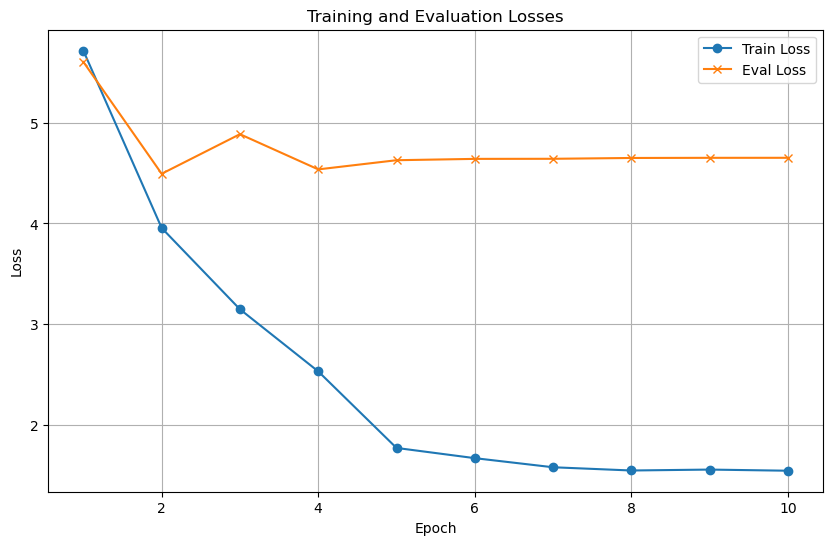

In [17]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, eval_losses):
    """
    Plots overall training and evaluation losses over epochs.
    """
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(train_losses) + 1)

    plt.plot(epochs, train_losses, label="Train Loss", marker="o")
    plt.plot(epochs, eval_losses, label="Eval Loss", marker="x")

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Evaluation Losses")
    plt.legend()
    plt.grid(True)
    plt.show()

print("Plotting losses...")
print("Train Losses:", train_losses)
print("Validation Losses:", val_losses)

# Plot losses (use this if the losses are overall, not task-specific)
plot_losses(train_losses, val_losses)

{'TONE_POLARITY': [480.737031891942, 251.8396256417036, 162.72294370271266, 111.43597141467035, 69.45110149495304, 69.93412495497614, 66.77668223530054, 61.9513022582978, 63.59892800077796, 61.40431997925043], 'TONE_FORMALITY': [44.813665180212666, 21.70254821526665, 16.766248682234618, 15.162008450235263, 13.00748609178779, 12.633876246713502, 12.526887876238572, 13.019271630400642, 13.099845896808691, 12.843758520809107], 'STS': [47.6946028726191, 34.78601942328032, 27.30438957758878, 23.490467376054994, 19.2923292511247, 16.67689278741856, 16.740584882550678, 16.170139648212515, 16.91163639135074, 18.217910062442172], 'PAWS': [341.2384021282196, 324.519906938076, 296.8706812262535, 254.90011398494244, 181.60214403271675, 167.86867716908455, 156.60846763849258, 156.36423034220934, 155.35728330165148, 154.68268823623657]}
{'TONE_POLARITY': [67.61775949597359, 35.14633794873953, 47.90322977863252, 30.809024633839726, 31.820497604086995, 32.16771945543587, 31.846141987480223, 31.5915052

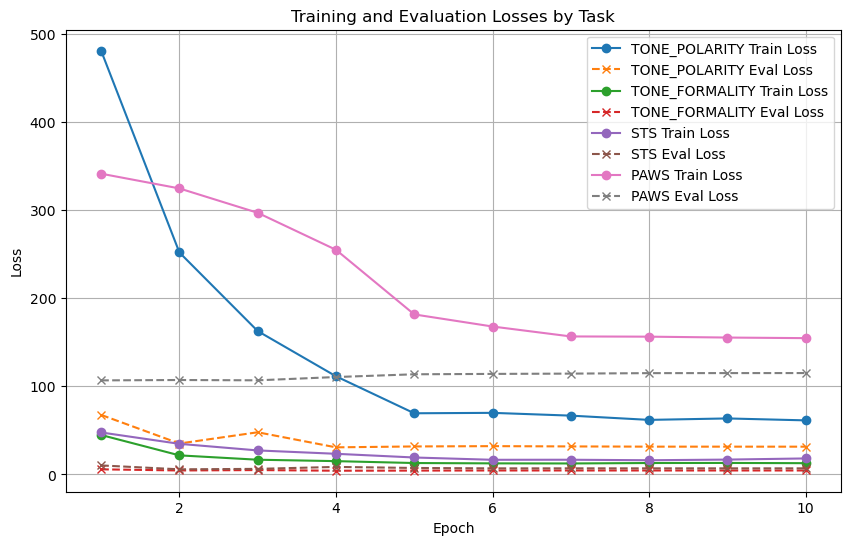

In [18]:
import matplotlib.pyplot as plt

def plot_task_losses(train_losses, eval_losses, task_names):
    """
    Plots training and evaluation losses for each task over epochs.
    """
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(list(train_losses.values())[0]) + 1)  # Number of epochs

    for task_name in task_names:
        train_task_losses = train_losses[task_name]
        eval_task_losses = eval_losses[task_name]

        plt.plot(epochs, train_task_losses, label=f"{task_name} Train Loss", marker="o")
        plt.plot(epochs, eval_task_losses, label=f"{task_name} Eval Loss", linestyle="--", marker="x")

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Evaluation Losses by Task")
    plt.legend()
    plt.grid(True)
    plt.show()

print(train_task_losses)
print(val_task_losses)

# Plot task-specific losses 
plot_task_losses(train_task_losses, val_task_losses, ["TONE_POLARITY", "TONE_FORMALITY", "STS", "PAWS"])
